# Analyzing gene expression in macrophages in Raghavan et al dataset

CK 2022

### What this does
- Loads in non malignant cells from Raghavan et al and subsets down to macrophages
- Runs differential expression analysis between macrophage subtypes
- Plots IL4I1 expression across macrophage subtypes

In [1]:
import pandas as pd 
import numpy as np
import scanpy as sc
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"

Loading in the macrophages from Raghavan et al

In [3]:
non_malignant_online = sc.read("../../../../Ivy/PDAC_in_vivo_validation_final/data/pdac_biopsy_allCells_preprocessed.h5ad")
non_malignant_meta = pd.read_csv("/Users/connerkummerlowe/Downloads/non_malignantCells_metadata_210305.csv",index_col=0)

temp = non_malignant_online
temp.obs.index = np.array(["_".join(x.split("_")[1:]) for x in temp.obs.index.values])
meta_temp = non_malignant_meta
meta_temp.index = np.array(["_".join(x.split("_")[1:]) for x in meta_temp.index.values])

spp1_indices = meta_temp.loc[meta_temp['cell.types.complex']== "SPP1_mono"].index.values
fcn1_indices = meta_temp.loc[meta_temp['cell.types.complex']== "FCN1_mono"].index.values
c1qc_indices = meta_temp.loc[meta_temp['cell.types.complex']== "C1QC_mono"].index.values

all_macrophages = np.hstack([spp1_indices,fcn1_indices,c1qc_indices])
macrophages = temp[np.isin(temp.obs.index.values,all_macrophages),:]

macrophages.obs['subtype'] = ''
macrophages.obs['subtype'].loc[np.isin(macrophages.obs.index.values,spp1_indices)] = "SPP1"
macrophages.obs['subtype'].loc[np.isin(macrophages.obs.index.values,fcn1_indices)] = "FCN1"
macrophages.obs['subtype'].loc[np.isin(macrophages.obs.index.values,c1qc_indices)] = "C1QC"

Differential expression analysis

In [ ]:
sc.tl.rank_genes_groups(macrophages, 'subtype', method='wilcoxon')
sc.pl.rank_genes_groups(macrophages, n_genes=25, sharey=False)

c1qc_DE_genes  = sc.get.rank_genes_groups_df(macrophages, group="C1QC")
fcn1_DE_genes  = sc.get.rank_genes_groups_df(macrophages, group="FCN1")
spp1_DE_genes  = sc.get.rank_genes_groups_df(macrophages, group="SPP1")

In [63]:
import re
il_genes = list(filter(lambda x: re.search(r'^IL', x), macrophages.var.index.values))

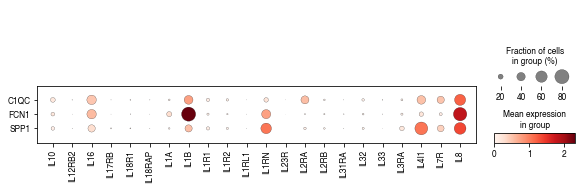

In [51]:
sc.pl.dotplot(macrophages,var_names=il_genes,groupby="subtype")

In [55]:
spp1_DE_genes.loc[np.isin(spp1_DE_genes.names.values,il_genes),:]

,scores,names,logfoldchanges,pvals,pvals_adj
32,17.463860,IL4I1,2.076467,2.700424e-68,8.461327e-66
167,10.340821,IL1RN,1.621286,4.605715e-25,2.606311e-23
791,4.473975,IL3RA,1.723013,7.677859e-06,9.345998e-05
1717,2.818334,IL7R,0.411548,4.827351e-03,3.008426e-02
5008,0.867838,IL17RB,2.888971,3.854829e-01,9.165865e-01
5191,0.803769,IL1R1,0.094954,4.215302e-01,9.676151e-01
6827,0.394679,IL1R2,-0.074245,6.930795e-01,1.000000e+00
7361,0.292910,IL18R1,0.715755,7.695908e-01,1.000000e+00
7806,0.225662,IL2RB,0.168788,8.214646e-01,1.000000e+00
10373,0.021108,IL1RL1,0.573965,9.831593e-01,1.000000e+00


Plotting IL4I expression

/opt/miniconda3/envs/drug_opt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/miniconda3/envs/drug_opt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


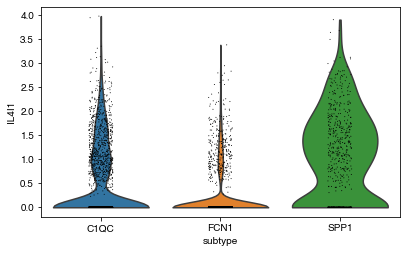

In [224]:
sc.pl.violin(macrophages,'IL4I1',groupby="subtype",save="_il4I1_expression_by_macrophage.pdf")